In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import geopandas

cost_df = pd.read_csv('./data/cost-of-living.csv', header=0)

print(cost_df.columns)
print(cost_df.shape)
cost_df.head()

#rename 'x54 column'
cost_df.rename(columns={'x54': 'Avg_monthly_salary(USD)'}, inplace=True)

#sort country and city alphabetically
cost_df.sort_values(by=['country', 'city'], ascending=True, inplace=True)

#set No. as index
cost_df.set_index('No.', inplace=True)

cost_df

Index(['No.', 'city', 'country', 'Meal', 'Meal_For_2', 'McDonalds_Meal',
       'Domestic_Beer_Rest(0.5L)', 'Imported_Beer_Rest(0.33L)', 'Cappuccino',
       'Coke/Pepsi', 'Water_Rest(0.33L)', 'Milk', 'Bread', 'Rice', 'Eggs',
       'Cheese', 'Chicken_Fillets', 'Beef', 'Apple', 'Bananas', 'Oranges',
       'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water_Market(1.5L)',
       'Wine_Market', 'Domestic_Beer_Market(0.5L)',
       'Imported_Beer_Market(0.33L)', 'Cigarettes', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'data_quality'],
      dtype='object')
(4874, 59)


,city,country,Meal,Meal_For_2,McDonalds_Meal,Domestic_Beer_Rest(0.5L),Imported_Beer_Rest(0.33L),Cappuccino,Coke/Pepsi,Water_Rest(0.33L),...,x47,x48,x49,x50,x51,x52,x53,Avg_monthly_salary(USD),x55,data_quality
No.,,,,,,,,,,,,,,,,,,,,,
2743,Gardez,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
814,Herat,Afghanistan,1.67,6.11,2.78,2.22,NaN,0.56,0.39,0.11,...,19.45,61.12,38.89,111.13,77.79,461.58,238.47,150.02,10.30,0
1389,Jalalabad,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.90,NaN,NaN,NaN,NaN,NaN,NaN,9.40,0
129,Kabul,Afghanistan,1.67,5.56,3.06,NaN,NaN,0.92,0.22,0.13,...,35.56,107.12,63.90,238.93,144.47,683.44,350.05,192.62,13.88,1
916,Mazar-e Sharif,Afghanistan,1.67,7.73,2.96,NaN,NaN,0.44,0.34,0.15,...,NaN,66.68,33.34,111.13,55.56,277.82,111.13,222.26,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,Karoi,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2702,Masvingo,Zimbabwe,7.00,40.00,6.00,1.30,2.0,2.20,0.72,0.47,...,51.43,60.00,NaN,300.00,150.00,NaN,582.52,NaN,15.00,0
1746,Mutare,Zimbabwe,7.00,40.00,6.00,1.30,2.0,2.20,0.72,0.47,...,51.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,0


/mnt/c/Users/Owner/Desktop/Data-engineer/Independent-Project/Cost-of-living/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/mnt/c/Users/Owner/Desktop/Data-engineer/Independent-Project/Cost-of-living/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


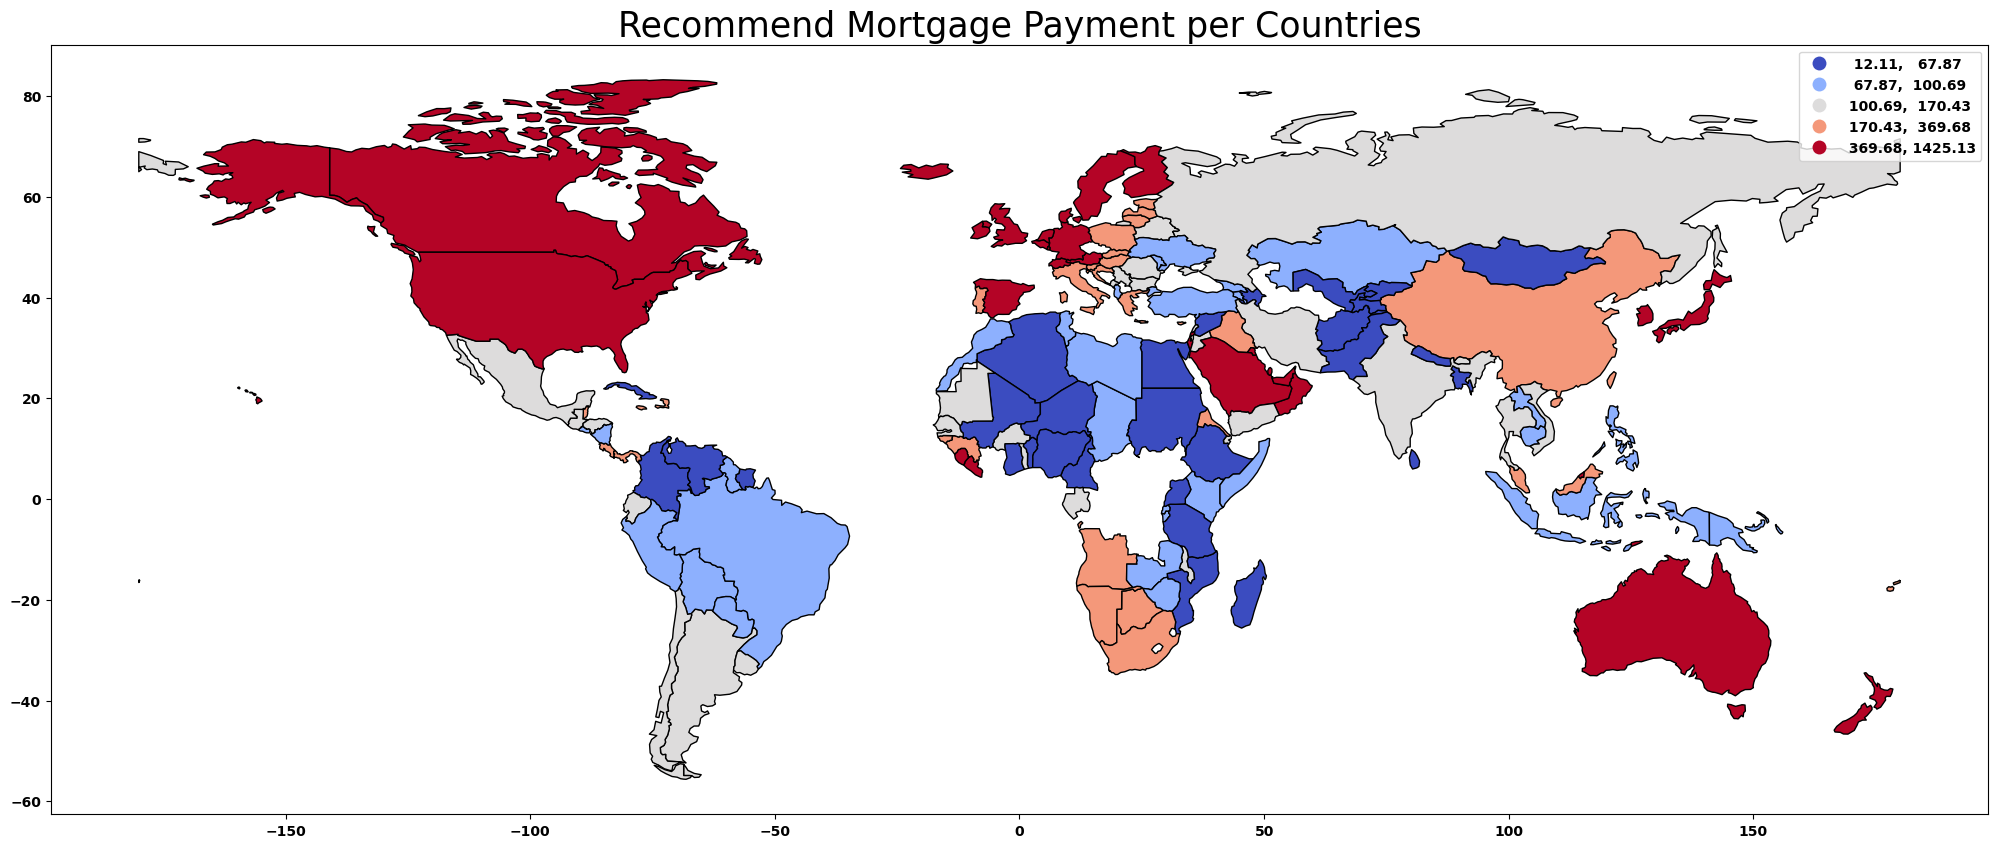

In [108]:
#create mortgage_df to drop Nan on 'Avg_monthly_salary(USD)'
mortgage_df = cost_df.dropna(subset=['Avg_monthly_salary(USD)'])

#calculate the 'Max_Mortgage_Pmt(USD)' based on 'Avg_monthly_salary(USD)'
mortgage_df['Max_Mortgage_Pmt(USD)'] = mortgage_df[['Avg_monthly_salary(USD)']].apply(lambda x: round((x*.25), 2))

#calculate 'Avg_mortgage_pmt' per country in general by
#add 'Avg_mortgage_pmt' column to mortgage_df
mortgage_df['Recommend_mortgage_pmt'] = round(mortgage_df.groupby(by=['country'])[['Max_Mortgage_Pmt(USD)']].transform(np.mean), 2)

#drop all columns except: 
mortgage_df = mortgage_df[['country', 'Avg_monthly_salary(USD)', 'Recommend_mortgage_pmt']]

#drop duplicates for country 
mortgage_df.drop_duplicates(subset='country', inplace=True)

# merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'country', 'CODE', 'gdp_md_est', 'geometry']

#rename US to match the name in world and mortgage_df
def rename_countries(value):
    if value == "United States":
        return 'United States of America'
    else:
        return value
mortgage_df['country'] = mortgage_df['country'].map(rename_countries)

#sort country in world alphabetically
world.sort_values(by=['country'], ascending=True, inplace=True)

# then merge world with our data 
mortgage_geo = pd.merge(world,mortgage_df,on='country')

# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
mortgage_geo = mortgage_geo.merge(location,left_on='country', right_on='name').reset_index()

# plot confirmed cases world map 
mortgage_geo.plot(column='Recommend_mortgage_pmt', scheme="quantiles", edgecolor="black",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')

plt.title('Recommend Mortgage Payment per Countries',fontsize=25)

plt.show()

In [109]:
tech_salaries_df = pd.read_csv('./data/tech-salaries.csv', header=0)

print(tech_salaries_df.columns)
print(tech_salaries_df.shape)

#drop Nan value in 'annual_base_pay', 'job_title', 'location_country'
tech_salaries_df.dropna(subset=['annual_base_pay', 'job_title', 'location_country'], inplace=True) 

#calculate monthly mortgage payment per_country and job_title by: groupby()
#add result to main df by: transform()
tech_salaries_df['Recom_mortgage_per_job_per_month'] = round(tech_salaries_df.groupby(by=['location_country', 'job_title'])[['annual_base_pay']].transform(lambda x: (x/12)*.25), 2)

tech_salaries_df

Index(['index', 'salary_id', 'employer_name', 'location_name',
       'location_state', 'location_country', 'location_latitude',
       'location_longitude', 'job_title', 'job_title_category',
       'job_title_rank', 'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus',
       'comments', 'submitted_at'],
      dtype='object')
(1655, 19)


,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at,Recom_mortgage_per_job_per_month
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58,2604.17
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58,1354.17
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59,1791.67
5,5,14,casino,eastern oregon,OR,US,38.00,-97.00,it technician,Other,NaN,5.0,1.5,40000.0,0.0,500.0,0,NaN,3/21/16 13:03,833.33
6,6,16,tetra tech,"madison, wi",WI,US,43.10,-89.50,lead interviewer,Other,NaN,4.0,2.5,45000.0,0.0,1500.0,NaN,NaN,3/21/16 13:03,937.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1646,3276,homenet automotive,"exton, pa",PA,US,40.03,-75.63,software engineer i,Software,1,2.0,1.0,60000.0,0.0,10.0,0,NaN,3/23/16 6:59,1250.00
1647,1647,3278,comcast,"philadelphia, pa",PA,US,39.95,-75.16,software engineer,Software,NaN,6.0,2.5,111000.0,5000.0,8.0,~$2000,NaN,3/23/16 7:05,2312.50
1649,1649,3287,mainz brady group - contractor at nike,"beaverton, or",OR,US,45.49,-122.80,front-end developer,Web,NaN,2.0,1.0,50.0,NaN,NaN,none,No paid sick leave or paid vacation.,3/23/16 8:16,1.04
1650,1650,3289,sparkfun electronics,"boulder, co",CO,US,40.02,-105.25,junior software developer,Software,Junior,1.0,0.5,60500.0,0.0,800.0,0,NaN,3/23/16 8:24,1260.42


In [110]:
#read code.csv
code_df = pd.read_csv('./data/codes.csv', header=0)

code_df.head()

#rename alpha-2 CODE
code_df.rename(columns={'Alpha-2 code':'location_country'}, inplace=True)

#remove double quotation mark in a string in location_country, and code columns
code_df['location_country'] = code_df['location_country'].apply(lambda x: eval(x))
code_df['CODE'] = code_df['CODE'].apply(lambda x: eval(x))


#merge tech-salaries and code df
tech_code = tech_salaries_df.merge(code_df, on="location_country").drop(columns=['Latitude (average)', 'Longitude (average)'])

#merge tech_code and morgage_geo:
mortgage_tech = mortgage_geo.merge(tech_code, on='country')

mortgage_tech[['country','job_title_category', 'employer_name', 'Avg_monthly_salary(USD)','annual_base_pay', 'Recom_mortgage_per_job_per_month']]

mortgage_tech_group = mortgage_tech.groupby(by=['country', 'job_title_category', 'Recommend_mortgage_pmt'])['Recom_mortgage_per_job_per_month'].mean()
print(mortgage_tech_group.sort_values().head(10))

mortgage_tech_group.sort_values().tail(10)



country      job_title_category  Recommend_mortgage_pmt
Cuba         Web                 47.45                       5.000000
Oman         Web                 374.36                     50.000000
India        Web                 108.14                     75.190000
Bulgaria     Engineering         163.22                    116.670000
Russia       Engineering         162.85                    165.620000
Venezuela    Web                 48.63                     175.000000
Vietnam      Software            108.44                    206.943333
Philippines  Other               70.03                     208.330000
Cyprus       Other               354.30                    250.000000
Argentina    Software            110.73                    251.040000
Name: Recom_mortgage_per_job_per_month, dtype: float64


country       job_title_category  Recommend_mortgage_pmt
Switzerland   Other               1425.13                    2552.080000
              Software            1425.13                    2916.670000
Sweden        Software            614.74                     3006.061429
Australia     Engineering         873.50                     3333.330000
Peru          Software            95.86                      4166.670000
South Africa  Other               305.59                     5416.670000
Pakistan      Software            38.41                      7291.665000
India         Software            108.14                     7974.604000
Australia     Other               873.50                    13901.045000
Hungary       Software            186.83                    62791.665000
Name: Recom_mortgage_per_job_per_month, dtype: float64